<a href="https://colab.research.google.com/github/nikhilrock183/Air-bnb-data-analysis/blob/main/Copy_of_Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from pandas.api.types import CategoricalDtype

%matplotlib inline

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
airbnb_nyc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Airbnb NYC 2019.csv')

In [ ]:
airbnb_nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_nyc.shape

(48895, 16)

In [ ]:
airbnb_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# How many room types are available for rental?
airbnb_nyc.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
# How many neighborhood groups are there?
airbnb_nyc.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
# How many neighborhoods are there?
airbnb_nyc.neighbourhood.nunique()

221

In [ ]:
# How many hosts are there?
airbnb_nyc.host_id.nunique()

37457

# **Q.1 What can we learn about different hosts and areas?**

The dataset has 16 columns and 48,895 rows, but a significant number of values seem to be missing from the last_review and reviews_per_month columns. It includes information about the listings, such as id, host name, room type, price, and neighborhood.

There are five different neighborhood groups, 221 neighborhoods, 37,457 hosts, 48,895 listings, and three types of room available for rental.


Now we are going to check the missing values and null values after that we will perform our Data analysis

In [ ]:
airbnb_nyc.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

From the above analysis we came to know that name has 16, host_name has has 21 last_reviw and rewies_per_month has more than 10000 null values.

so now we are going to replace all the null values with zero.

In [ ]:
airbnb_nyc.fillna({'reviews_per_month': 0,'host_name' : 0,'name' : 0,'last_review':0,'number_of_reviews':0}, inplace=True)

In [ ]:
# Checking the changes
airbnb_nyc.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
# lets check for duplicated values
airbnb_nyc.duplicated().sum()

0

No duplicated values found

In [ ]:
airbnb_nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.541200e+04,3.541200e+04,35412.000000,35412.000000,35412.000000,35412.000000,35412.000000,35412.000000,35412.000000,35412.000000
mean,1.838531e+07,6.210199e+07,40.730095,-73.955117,128.667627,6.841692,24.779792,1.100931,6.468457,107.548712
std,1.101024e+07,7.589331e+07,0.053012,0.043412,53.650668,20.749681,45.766051,1.582505,31.665089,129.192675
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,60.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,8.753552e+06,6.841194e+06,40.691550,-73.983970,85.000000,1.000000,1.000000,0.050000,1.000000,0.000000
50%,1.885431e+07,2.607153e+07,40.724455,-73.957530,119.000000,3.000000,6.000000,0.390000,1.000000,37.000000
75%,2.834142e+07,9.233342e+07,40.764060,-73.940450,165.000000,5.000000,26.000000,1.620000,2.000000,209.000000
max,3.648724e+07,2.743213e+08,40.907340,-73.712990,269.000000,1250.000000,540.000000,58.500000,327.000000,365.000000


the average price is 152.72, the average minimum nights stay is 7.03 nights, and the average number of reviews is 23.27 per listing. We also learn that a host has an average of 7.14 places listed and availability averages 112.78 vacant days per year.
the min price is showing zero which cant be possible.

In [ ]:
airbnb_nyc.agg(
    {'price': ['mean', 'median', 'min', 'max', 'count']})

,price
mean,152.720687
median,106.000000
min,0.000000
max,10000.000000
count,48895.000000


the minimum price is zero, since no hotel will provide free rooms which is impossible

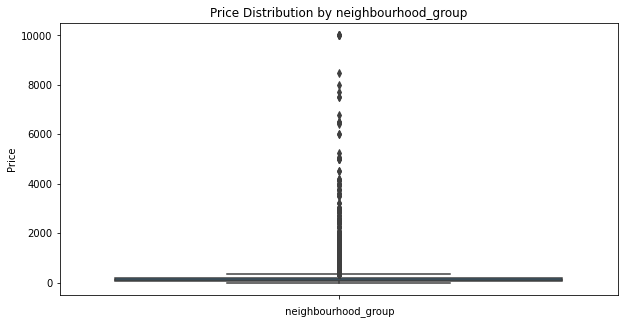

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=airbnb_nyc).set_title('Price Distribution by neighbourhood_group')
sns.set_theme(style='white')
plt.xlabel(' neighbourhood_group')
plt.ylabel('Price')
plt.show()

lets check number of listing

In [ ]:
airbnb_pivot = pd.pivot_table(airbnb_nyc, index=['neighbourhood_group'], values='id', aggfunc=['count'], 
                              margins=True, margins_name='Total Count')
airbnb_pivot

,count
,id
neighbourhood_group,
Bronx,618
Brooklyn,14313
Manhattan,16678
Queens,3578
Staten Island,225
Total Count,35412


As we know pivot table is used to summarise  data thats how we come to know anout the listings of all the neighbourhood groups.

Bronx	618
Brooklyn	14313
Manhattan	16678
Queens	3578
Staten Island	225
Total Count	35412

Lets plot a pie chart to clearly see the number of listing

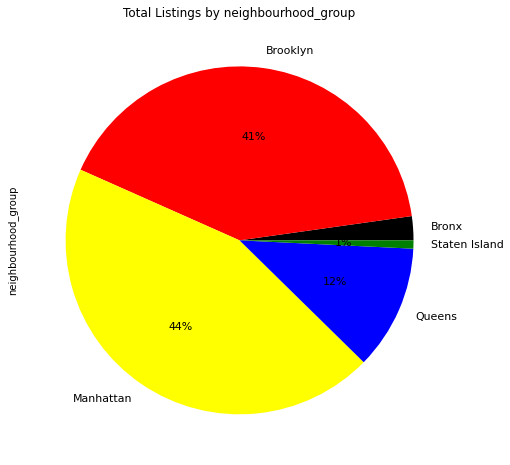

In [ ]:
df2 = airbnb_nyc.groupby(['neighbourhood_group'])['id'].count()
df2.plot.pie(ylabel='neighbourhood_group', title='Total Listings by neighbourhood_group', 
             autopct='%1.0f%%', fontsize='11', colors=['black', 'red', 'yellow', 'blue', 'green'],
             startangle=0, figsize=(10,8))
plt.show()

We can see that Manhattan has the highest number of listings - making up for 47% of the total - followed by Brooklyn with 40%. The other three boroughs have significantly less listings: Queens (10%), Bronx (2%), and Staten Island (1%).

In [ ]:
airbnb_nyc.host_name.unique()

array(['John', 'Jennifer', 'Elisabeth', ..., 'Qizhi', 'Abayomi',
       'Ilgar & Aysel'], dtype=object)

# **Q2.What can we learn from predictions? (ex: locations, prices, reviews, etc)**

In [ ]:
# creating palette
my_pal = {'Brooklyn': 'green', 'Manhattan': 'blue', 'Queens': 'red', 'Staten Island': 'yellow', 'Bronx': 'brown'}

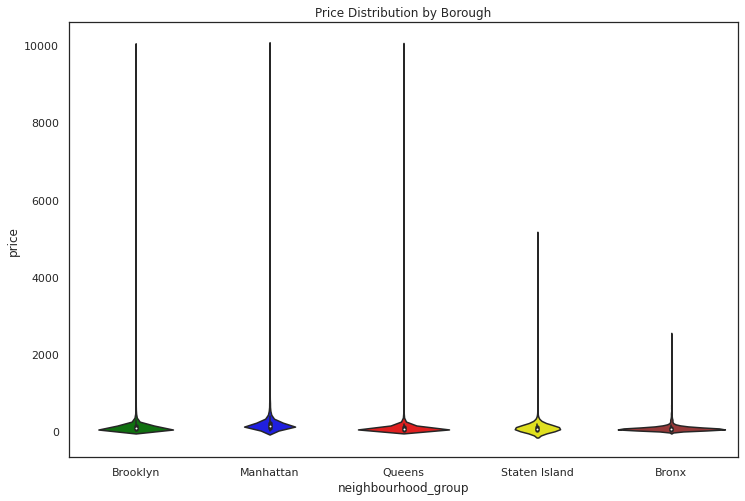

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="neighbourhood_group", y="price", data=airbnb_nyc, palette=my_pal).set_title('Price Distribution by Borough')
plt.show()

 there are outliers present. In order to fix this issue, we will use quantile-based flooring and capping to treat the outliers.

In [ ]:
# low quantile
q_low = airbnb_nyc['price'].quantile(0.10)
q_low

60.0

In [ ]:
# high quantile
q_high = airbnb_nyc['price'].quantile(0.90)
q_high

200.0

In [ ]:
# removing rows with values below 0.10
airbnb_nyc = airbnb_nyc.drop(airbnb_nyc[airbnb_nyc.price < q_low].index)

In [ ]:
airbnb_nyc = airbnb_nyc.drop(airbnb_nyc[airbnb_nyc.price > q_high].index)

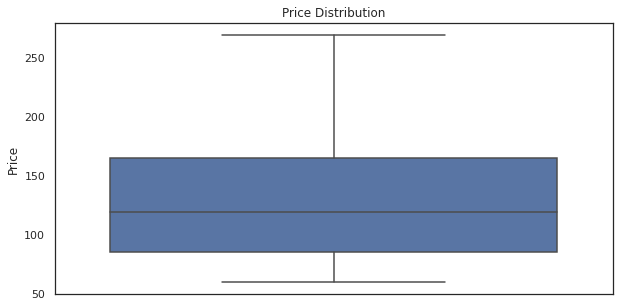

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=airbnb_nyc).set_title('Price Distribution')
sns.set_theme(style='white')
plt.ylabel('Price')
plt.show()

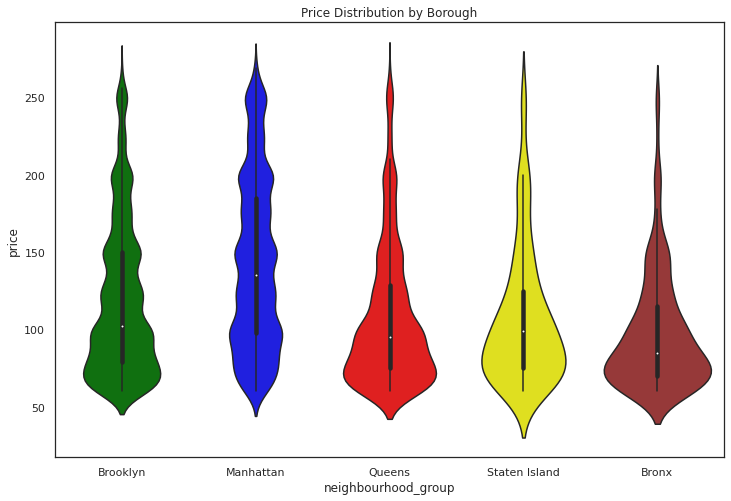

In [ ]:
#violin plot
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="neighbourhood_group", y="price", data=airbnb_nyc, palette=my_pal).set_title('Price Distribution by Borough')
plt.show()

average price by neighbourhood_group

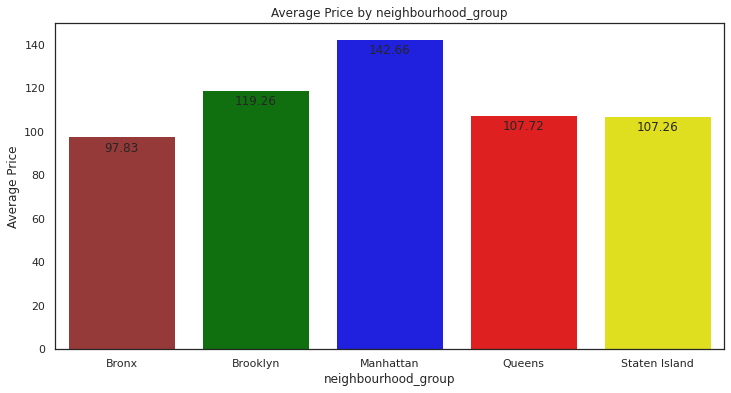

In [ ]:
# bar plot of average price of neighbourhood group
df = airbnb_nyc[['neighbourhood_group', 'price']]
df = airbnb_nyc.groupby(['neighbourhood_group'], as_index=False)[['price']].mean()

plt.figure(figsize=(12, 6))
df = sns.barplot(x="neighbourhood_group", y="price", data=df, palette=my_pal)
for p in df.patches:
    df.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size = 12, 
                   xytext = (0, -12), textcoords = 'offset points')
    
plt.xlabel('neighbourhood_group')
plt.ylabel('Average Price')
plt.title('Average Price by neighbourhood_group')
plt.show()



In the above chart,the moat expensive neighbourhood_group is Manhattam with avg of $142.66.

The second most expensive is Brooklyn with avg $119.26.

The prices for the three other boroughs are cheaper, with the Bronx being the most affordable one, averaging $97.83.

In [ ]:
airbnb_nyc.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


average price by room type

In [ ]:
my_pal2 = {'Entire home/apt': 'red', 'Private room': 'blue', 'Shared room': 'yellow'}

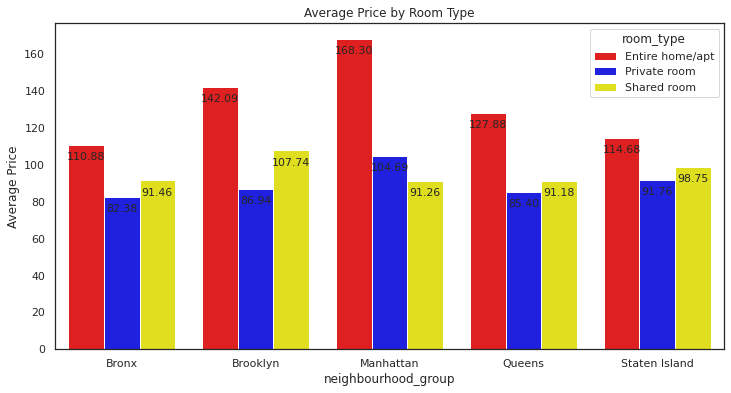

In [ ]:
# bar plot average price by room type
df = airbnb_nyc[['neighbourhood_group', 'room_type', 'price']]
df = df.groupby(['neighbourhood_group', 'room_type'], as_index=False)[['price']].mean()

plt.figure(figsize=(12, 6))
sns.set_theme(style='white')
df = sns.barplot(x="neighbourhood_group", y="price", data=df, hue='room_type', palette=my_pal2)
for p in df.patches:
    df.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size = 11, 
                   xytext = (0, -12), textcoords = 'offset points')
    plt.xlabel('neighbourhood_group')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.show()


The data is grouped by neighbourhood_group and room type. Manhattan maintains the highest prices for both entire homes and private rooms, and the average price for a shared room costs more than a private room in all the other neighbourhood_group.

In [ ]:
airbnb_nyc['number_of_reviews'].value_counts().mean()

96.75409836065573

In [ ]:
df_r=airbnb_nyc.groupby(['last_review', 'neighbourhood_group'])['number_of_reviews'].mean().unstack()

In [ ]:
df_r.fillna(0, inplace=True)
df_r

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
last_review,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000
2011-04-25,0.000000,14.000000,0.000000,0.000000,0.000000
2011-05-12,0.000000,2.000000,0.000000,0.000000,0.000000
2011-09-18,0.000000,9.000000,0.000000,0.000000,0.000000
2011-09-19,0.000000,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...
2019-07-04,28.500000,63.059406,62.872093,57.586207,53.500000
2019-07-05,17.090909,62.489011,67.714286,53.888889,59.857143
2019-07-06,36.272727,59.022727,57.143791,56.000000,55.000000


Text(0.5, 0, 'neighbourhood_group')

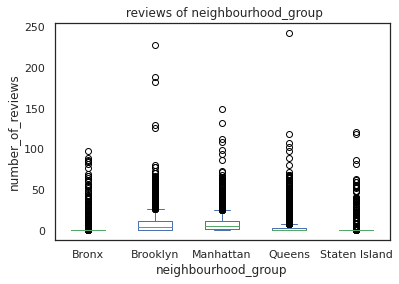

In [ ]:
# reviews box plot
df_r.plot(kind="box")
plt.title(' reviews of neighbourhood_group')
plt.ylabel('number_of_reviews')
plt.xlabel('neighbourhood_group')


the above graph show the analysis of reviews of neighbourhood_group

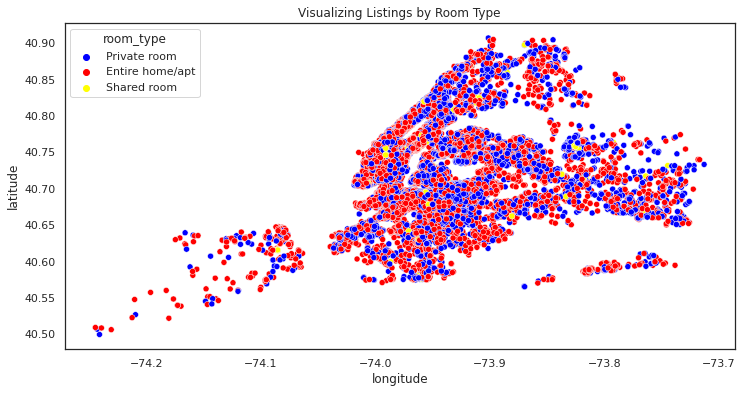

In [ ]:
#types of room scatter plot
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,6))
sns.scatterplot(airbnb_nyc.longitude, airbnb_nyc.latitude, 
                hue=airbnb_nyc.room_type, palette=my_pal2).set_title('Visualizing Listings by Room Type')
plt.ioff()

In this scatter plot map, it is easy to spot the different room types available for rental in NYC. Manhattan is the only neighbourhood_group that has more entire homes listed than any other type of accommodation. As for the other neighbourhood_group, private room is the most popular room type, presenting the most offers.

In [ ]:
busy_host=airbnb_nyc[(airbnb_nyc['neighbourhood_group'] == 'Manhattan') & (airbnb_nyc['host_name']) & (airbnb_nyc['room_type'] == 'Entire home/apt') & (airbnb_nyc['number_of_reviews'] > 350)]

In [ ]:
busy_host

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
341,84659,Large Studio--Heart of East Village,462776,Kyle,Manhattan,East Village,40.72843,-73.98895,Entire home/apt,139,1,388,2019-06-26,3.88,1,142
398,126443,☆Massive DUPLEX☆ 2BR & 2BTH East Village 9+ Gu...,627217,Seith,Manhattan,East Village,40.72939,-73.98857,Entire home/apt,189,2,403,2019-07-07,4.10,3,201
3552,2119216,"Affordable, Private, Simple & Clean NYC Flat!",10806025,Christina,Manhattan,Harlem,40.82029,-73.93861,Entire home/apt,80,1,353,2019-06-19,5.26,1,258
4940,3540722,Modern Bohemian Studio,17820464,Allison,Manhattan,East Village,40.72454,-73.97836,Entire home/apt,145,1,358,2018-12-03,5.96,1,3
5382,3888752,"Bright, quiet, cozy 1BR by C Park!",20116872,Michael,Manhattan,Upper West Side,40.77571,-73.97757,Entire home/apt,195,1,401,2019-06-30,6.76,1,178


In [ ]:
# creating a pivot table
table = pd.pivot_table(busy_host, values='number_of_reviews', index=['host_name'])
table

,number_of_reviews
host_name,
Allison,358
Christina,353
Kyle,388
Michael,401
Seith,403


Text(0.5, 0, 'host_name')

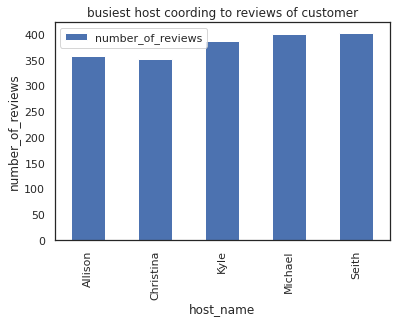

In [ ]:
# bar plot according to the reviews 
table.plot(kind='bar')

plt.title('busiest host coording to reviews of customer')
plt.ylabel('number_of_reviews')
plt.xlabel('host_name')

The above bar plot shows high rated hosts

# **Q3.Which hosts are the busiest and why?** 

In [ ]:
#groupby neighbour_hood mean
airbnb_nyc.groupby(['neighbourhood_group'])['availability_365'].mean()

neighbourhood_group
Bronx            171.022654
Brooklyn          98.475582
Manhattan        104.657693
Queens           140.540246
Staten Island    200.035556
Name: availability_365, dtype: float64

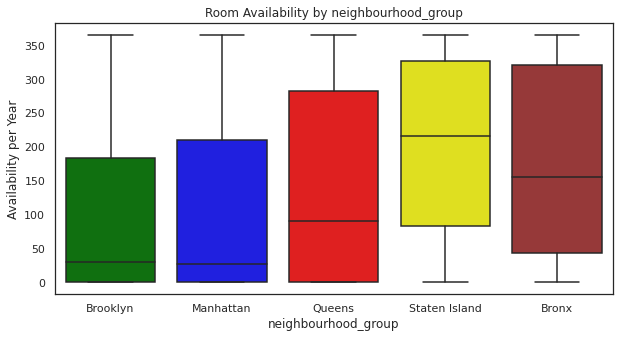

In [ ]:
# box plot of availability of room
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=airbnb_nyc, x='neighbourhood_group', y='availability_365', palette=my_pal).set_title('Room Availability by neighbourhood_group')
sns.set_theme(style='white')
plt.xlabel('neighbourhood_group')
plt.ylabel('Availability per Year')
plt.show()

In [ ]:
# busy host according to the availability 365
busy_host2=airbnb_nyc[(airbnb_nyc['availability_365'] <50) & (airbnb_nyc['neighbourhood_group']== 'Manhattan')& (airbnb_nyc['room_type'] == 'Entire home/apt')& (airbnb_nyc['number_of_reviews'] > 350)]
busy_host2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4940,3540722,Modern Bohemian Studio,17820464,Allison,Manhattan,East Village,40.72454,-73.97836,Entire home/apt,145,1,358,2018-12-03,5.96,1,3


In [ ]:
table2 =pd.pivot_table(busy_host2, values='availability_365', index=['host_name'])
table2

,availability_365
host_name,
Allison,3


The above analysis shows the host name which is busiest among all because of availability_365 ia only 3 and the number of reviews are maximum than 350

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


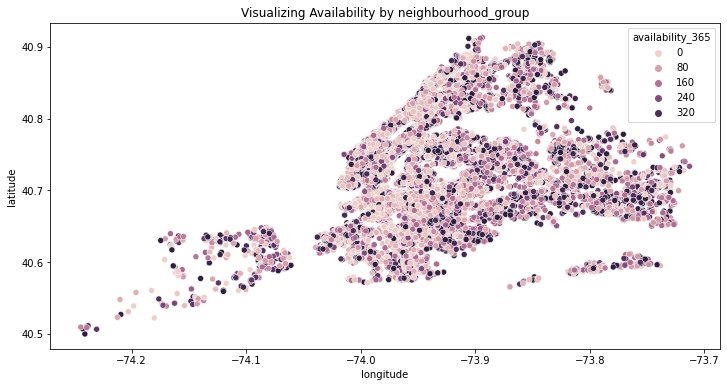

In [ ]:
# scatter plot can help determine availability in the different Neighbourhood_group
plt.figure(figsize=(12,6))
sns.scatterplot(airbnb_nyc.longitude, airbnb_nyc.latitude, 
                hue=airbnb_nyc.availability_365).set_title('Visualizing Availability by neighbourhood_group')
plt.ioff()

A scatter plot map can help determine availability in the different Neighbourhood_group. We can see that Manhattan and Brooklyn are less available throughout the year in comparison to the other boroughs.

# **Q4.Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

We can determine the traffic difference through number of listings in neighbourhood

In [ ]:
d = airbnb_nyc.groupby(['neighbourhood'])['id'].count().nlargest(10)
d

neighbourhood
Williamsburg          3145
Bedford-Stuyvesant    2495
Harlem                2029
Upper West Side       1563
Hell's Kitchen        1554
East Village          1553
Upper East Side       1529
Bushwick              1432
Crown Heights         1084
Midtown                995
Name: id, dtype: int64

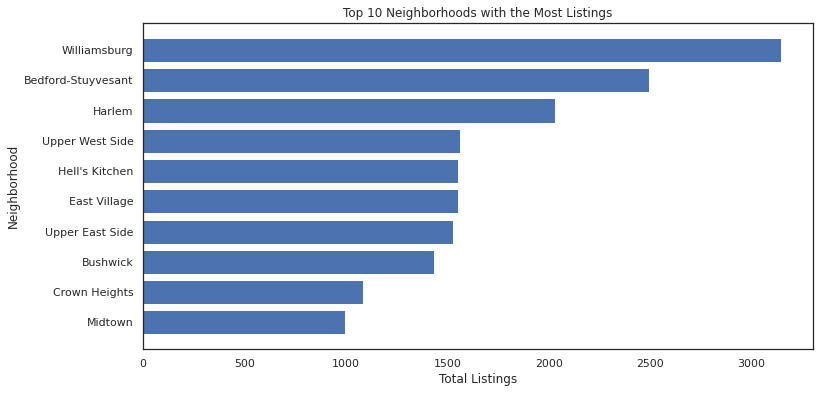

In [ ]:
#plotting number of listings
plt.figure(figsize=(12,6))
x = list(d.index)
y = list(d.values)
x.reverse()
y.reverse()

plt.title("Top 10 Neighborhoods with the Most Listings")
plt.ylabel("Neighborhood")
plt.xlabel("Total Listings")

plt.barh(x, y)
plt.show()

The neighborhoods with the most listings are in Manhattan and Brooklyn – which is understandable – given that tourists are more likely to stay in those areas. Williamsburg, in Brooklyn, appears first with 3145 listings. In Manhattan, Harlem has the most listings, totaling 2029 offers.

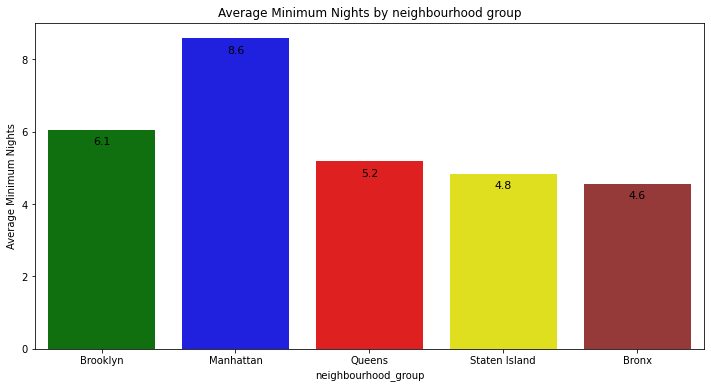

In [ ]:
#box plot average minimum nights
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="neighbourhood_group", y="minimum_nights", data=airbnb_nyc, palette=my_pal, ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size = 11, 
                   xytext = (0, -12), textcoords = 'offset points')
plt.xlabel('neighbourhood_group')
plt.ylabel('Average Minimum Nights')
plt.title('Average Minimum Nights by neighbourhood group')
plt.show()

Every place listed on Airbnb has its own policy when it comes to the minimum number of nights that a guest can book a rental place. Manhattan has the highest number of minimum nights - 8.6 nights - while Brooklyn appears in second place, with a minimum of 6.1 nights.